灰色关联度分析(Grey relational analysis)

在灰色系统中，如何从纷乱的数据中找出影响系统核心行为（"系统主行为"）的关键因素（"因子"），并量化各因素影响程度的强弱次序？传统的数据分析（如回归分析、相关性分析）需要大量数据且要求数据符合一定的统计规律（如正态分布），而GRA则擅长在**数据量少**、**数据分布特征不明确**的情况下进行因素分析。

In [46]:
import pandas as pd

# 创建数据字典
data = {
    '评价指标': ['产品质量', '产品价格/元', '地理位置/km', '售后服务/h', '技术水平', 
               '经济效益', '供应能力/件', '市场影响度', '交货情况'],
    '1': [0.83, 326, 21, 3.2, 0.20, 0.15, 250, 0.23, 0.87],
    '2': [0.90, 295, 38, 2.4, 0.25, 0.20, 180, 0.15, 0.95],
    '3': [0.99, 340, 25, 2.2, 0.12, 0.14, 300, 0.27, 0.99],
    '4': [0.92, 287, 19, 2.0, 0.33, 0.09, 200, 0.30, 0.89],
    '5': [0.87, 310, 27, 0.9, 0.20, 0.15, 150, 0.18, 0.82],
    '6': [0.95, 303, 10, 1.7, 0.09, 0.17, 175, 0.26, 0.94]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置评价指标为索引
df.set_index('评价指标', inplace=True)

df.index = pd.Index([f'指标{i}' for i in range(1, len(df.index)+1)], name='评价指标')

df.columns = pd.Index([f'方案{j}' for j in range(1, len(df.columns)+1)], name='方案')

df = df.T

print(df)

评价指标   指标1    指标2   指标3  指标4   指标5   指标6    指标7   指标8   指标9
方案                                                         
方案1   0.83  326.0  21.0  3.2  0.20  0.15  250.0  0.23  0.87
方案2   0.90  295.0  38.0  2.4  0.25  0.20  180.0  0.15  0.95
方案3   0.99  340.0  25.0  2.2  0.12  0.14  300.0  0.27  0.99
方案4   0.92  287.0  19.0  2.0  0.33  0.09  200.0  0.30  0.89
方案5   0.87  310.0  27.0  0.9  0.20  0.15  150.0  0.18  0.82
方案6   0.95  303.0  10.0  1.7  0.09  0.17  175.0  0.26  0.94


In [47]:
cost_class = ["指标2", "指标3", "指标4"]

for col in df.columns:
    if col in cost_class:
        df[col] = (df[col].max() - df[col]) / (df[col].max() - df[col].min())
    else:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print(df)

评价指标     指标1       指标2       指标3       指标4       指标5       指标6       指标7  \
方案                                                                         
方案1   0.0000  0.264151  0.607143  0.000000  0.458333  0.545455  0.666667   
方案2   0.4375  0.849057  0.000000  0.347826  0.666667  1.000000  0.200000   
方案3   1.0000  0.000000  0.464286  0.434783  0.125000  0.454545  1.000000   
方案4   0.5625  1.000000  0.678571  0.521739  1.000000  0.000000  0.333333   
方案5   0.2500  0.566038  0.392857  1.000000  0.458333  0.545455  0.000000   
方案6   0.7500  0.698113  1.000000  0.652174  0.000000  0.727273  0.166667   

评价指标       指标8       指标9  
方案                        
方案1   0.533333  0.294118  
方案2   0.000000  0.764706  
方案3   0.800000  1.000000  
方案4   1.000000  0.411765  
方案5   0.200000  0.000000  
方案6   0.733333  0.705882  


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("="*60)
print("【灰色关联度分析(Grey Relational Analysis)】")
print("="*60)

print("\n标准化后的数据矩阵:")
print(df.round(4))

# ========== 步骤1: 确定参考序列（母序列）==========
print("\n" + "="*40)
print("【步骤1: 确定参考序列】")
print("="*40)

reference_sequence = []
for col in df.columns:
    reference_sequence.append(df[col].max())

reference_series = pd.Series(reference_sequence, index=df.columns, name='理想方案')
print("\n参考序列（理想方案）:")
print(reference_series)

# ========== 步骤2: 计算灰色关联系数 ==========
print("\n" + "="*40)
print("【步骤2: 计算灰色关联系数】")
print("="*40)

# 分辨系数ρ，通常取0.5
rho = 0.5
print(f"分辨系数 ρ = {rho}")

# 计算关联系数矩阵
correlation_coefficients = pd.DataFrame(index=df.index, columns=df.columns)
print(f"\n各方案与参考序列的关联系数:")
print("关联系数公式: γ(x₀(k), xᵢ(k)) = (min_min + ρ×max_max) / (Δᵢ(k) + ρ×max_max)")

# 对于每一个策略(m)
for scheme in df.index:
    print(f"\n{scheme}:")

    # 对于每一个指标(n)
    for indicator in df.columns:
        # 计算绝对差值
        delta = abs(df.loc[scheme, indicator] - reference_series[indicator])
        
        # 计算所有绝对差值
        all_deltas = []
        for s in df.index:
            for ind in df.columns:
                all_deltas.append(abs(df.loc[s, ind] - reference_series[ind]))
        
        min_min = min(all_deltas)  # 最小的最小差
        max_max = max(all_deltas)  # 最大的最大差
        
        # 计算关联系数
        coefficient = (min_min + rho * max_max) / (delta + rho * max_max)
        correlation_coefficients.loc[scheme, indicator] = coefficient
        
        print(f"  {indicator}: Δ={delta:.4f}, γ={coefficient:.4f}")

print(f"\n完整关联系数矩阵:")
print(correlation_coefficients.round(4))

# ========== 步骤3: 计算灰色关联度 ==========
print("\n" + "="*40)
print("【步骤3: 计算灰色关联度】")
print("="*40)

# 定义各指标权重（可以根据实际情况调整）
# 这里提供两种权重方案供选择

# 方案1: 等权重
equal_weights = np.array([1/len(df.columns)] * len(df.columns))

# 方案2: 自定义权重（示例：根据指标重要性分配）
# 假设指标重要性排序：产品质量 > 交货情况 > 技术水平 > 经济效益 > 市场影响度 > 供应能力 > 售后服务 > 地理位置 > 产品价格
custom_weights = np.array([0.2, 0.08, 0.1, 0.12, 0.15, 0.13, 0.09, 0.11, 0.02])  # 权重总和为1

print("可选择的权重方案:")
print("1. 等权重方案:")
for i, weight in enumerate(equal_weights):
    print(f"   {df.columns[i]}: {weight:.4f}")

print("\n2. 自定义权重方案:")
for i, weight in enumerate(custom_weights):
    print(f"   {df.columns[i]}: {weight:.4f}")

# 选择权重方案（这里使用自定义权重，可以根据需要修改）
weights = equal_weights
print(f"\n选用权重方案: 等权重")
print(f"权重总和: {weights.sum():.4f}")

# 计算各方案的关联度（加权平均）
correlation_degrees = correlation_coefficients.dot(weights)

print(f"\n各方案的灰色关联度:")
for scheme, degree in correlation_degrees.items():
    print(f"  {scheme}: {degree:.6f}")

# ========== 步骤4: 排序和分析 ==========
print("\n" + "="*40)
print("【步骤4: 排序分析】")
print("="*40)

# 按关联度排序
sorted_schemes = correlation_degrees.sort_values(ascending=False)

print("最终排序结果:")
print("排名  方案    关联度     优劣评价")
print("-" * 35)
for rank, (scheme, degree) in enumerate(sorted_schemes.items(), 1):
    if degree >= 0.8:
        evaluation = "优秀"
    elif degree >= 0.7:
        evaluation = "良好"
    elif degree >= 0.6:
        evaluation = "一般"
    else:
        evaluation = "较差"
    
    print(f"{rank:2d}   {scheme}   {degree:.6f}   {evaluation}")

best_scheme = sorted_schemes.index[0]
best_degree = sorted_schemes.iloc[0]
print(f"\n最优方案: {best_scheme} (关联度: {best_degree:.6f})")

print("\n" + "="*60)

【灰色关联度分析(Grey Relational Analysis)】

标准化后的数据矩阵:
评价指标     指标1     指标2     指标3     指标4     指标5     指标6     指标7     指标8     指标9
方案                                                                          
方案1   0.0000  0.2642  0.6071  0.0000  0.4583  0.5455  0.6667  0.5333  0.2941
方案2   0.4375  0.8491  0.0000  0.3478  0.6667  1.0000  0.2000  0.0000  0.7647
方案3   1.0000  0.0000  0.4643  0.4348  0.1250  0.4545  1.0000  0.8000  1.0000
方案4   0.5625  1.0000  0.6786  0.5217  1.0000  0.0000  0.3333  1.0000  0.4118
方案5   0.2500  0.5660  0.3929  1.0000  0.4583  0.5455  0.0000  0.2000  0.0000
方案6   0.7500  0.6981  1.0000  0.6522  0.0000  0.7273  0.1667  0.7333  0.7059

【步骤1: 确定参考序列】

参考序列（理想方案）:
评价指标
指标1    1.0
指标2    1.0
指标3    1.0
指标4    1.0
指标5    1.0
指标6    1.0
指标7    1.0
指标8    1.0
指标9    1.0
Name: 理想方案, dtype: float64

【步骤2: 计算灰色关联系数】
分辨系数 ρ = 0.5

各方案与参考序列的关联系数:
关联系数公式: γ(x₀(k), xᵢ(k)) = (min_min + ρ×max_max) / (Δᵢ(k) + ρ×max_max)

方案1:
  指标1: Δ=1.0000, γ=0.3333
  指标2: Δ=0.7358, γ=0.4046
  指

【可视化分析】


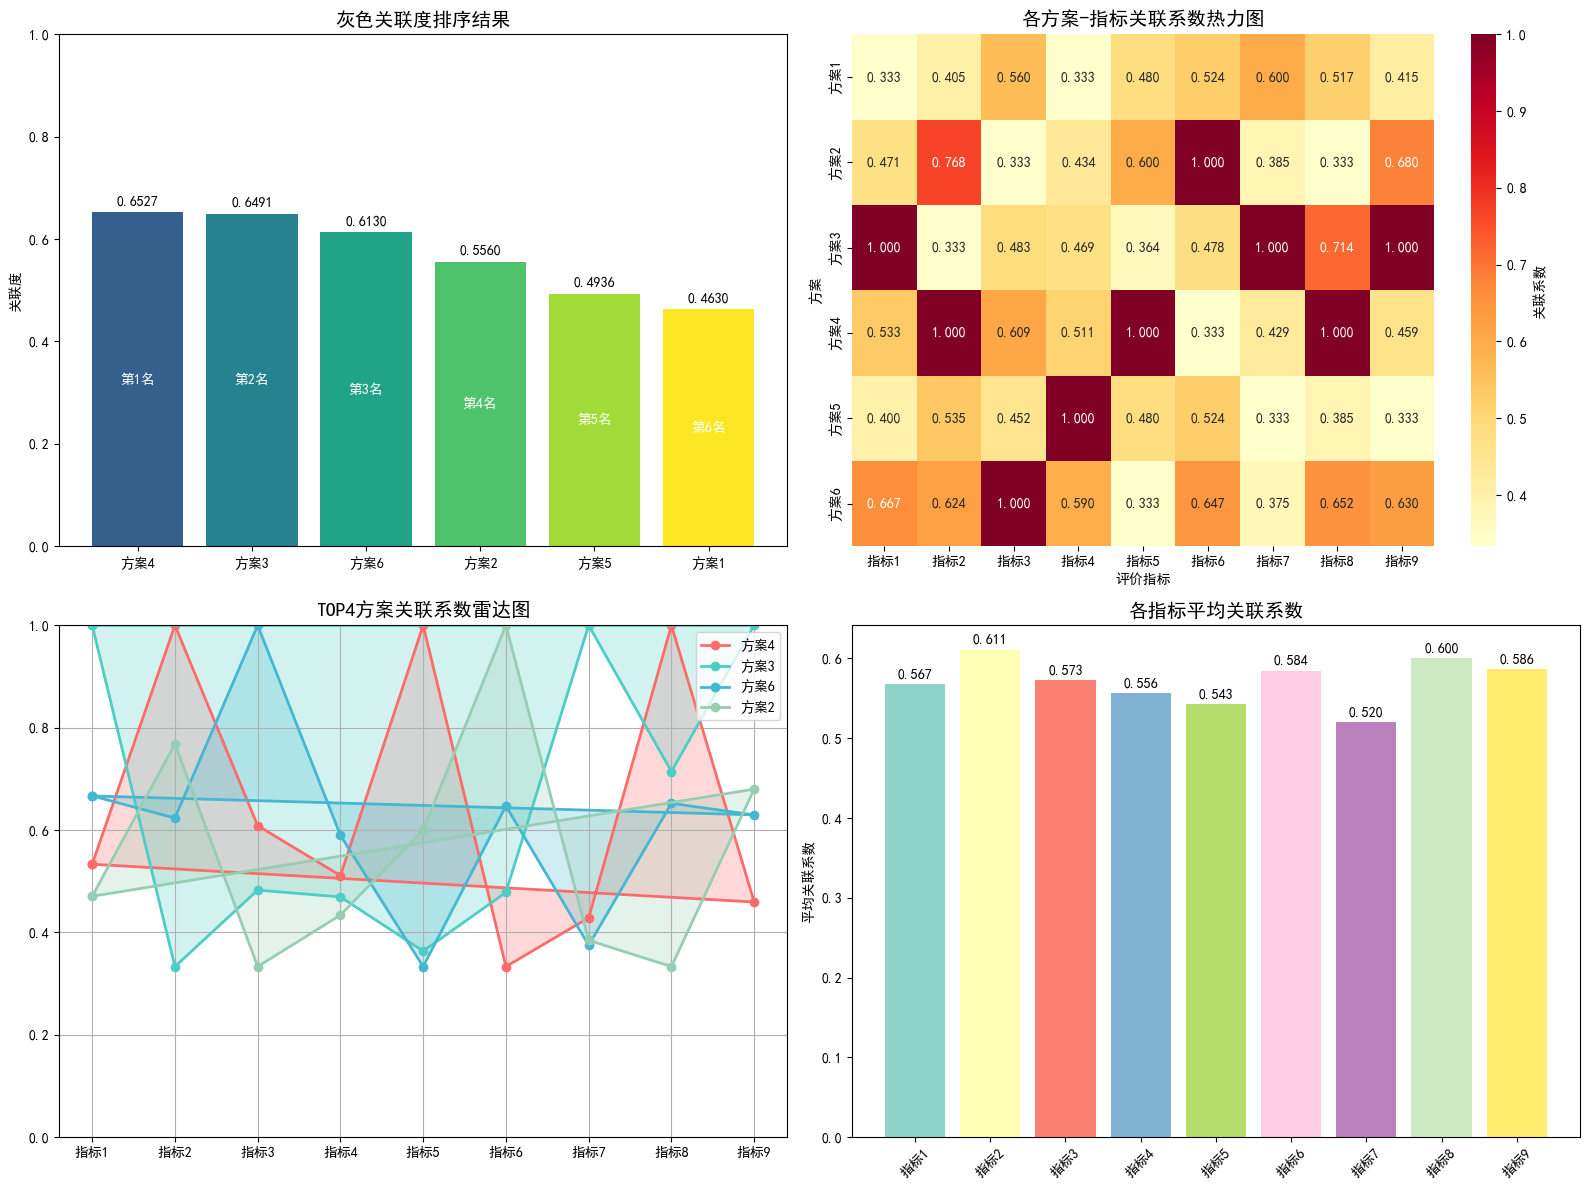

In [49]:
# ========== 可视化分析 ==========
print("【可视化分析】")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. 关联度排序柱状图
schemes_list = sorted_schemes.index.tolist()
degrees_list = sorted_schemes.values.tolist()

# 使用渐变色表示排名
colors = plt.cm.viridis(np.linspace(0.3, 1, len(schemes_list)))
bars1 = ax1.bar(schemes_list, degrees_list, color=colors)

ax1.set_title('灰色关联度排序结果', fontsize=14, fontweight='bold')
ax1.set_ylabel('关联度')
ax1.set_ylim(0, 1)

# 添加数值标签和排名
for i, (bar, degree) in enumerate(zip(bars1, degrees_list)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{degree:.4f}', ha='center', va='bottom', fontweight='bold')
    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
             f'第{i+1}名', ha='center', va='center', 
             fontweight='bold', color='white')

# 2. 关联系数热力图
import seaborn as sns
sns.heatmap(correlation_coefficients.astype(float), annot=True, fmt='.3f', 
            cmap='YlOrRd', ax=ax2, cbar_kws={'label': '关联系数'})
ax2.set_title('各方案-指标关联系数热力图', fontsize=14, fontweight='bold')
ax2.set_xlabel('评价指标')
ax2.set_ylabel('方案')

# 3. 雷达图对比（前4名方案）
top4_schemes = sorted_schemes.head(4).index
angles = np.linspace(0, 2 * np.pi, len(df.columns), endpoint=False).tolist()
angles += angles[:1]

colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for i, scheme in enumerate(top4_schemes):
    values = correlation_coefficients.loc[scheme].values.tolist()
    values += values[:1]
    ax3.plot(angles, values, 'o-', linewidth=2, label=scheme, color=colors_radar[i])
    ax3.fill(angles, values, alpha=0.25, color=colors_radar[i])

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels([f'指标{i}' for i in range(1, len(df.columns)+1)])
ax3.set_ylim(0, 1)
ax3.set_title('TOP4方案关联系数雷达图', fontsize=14, fontweight='bold')
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax3.grid(True)

# 4. 各指标的平均关联系数
indicator_avg_corr = correlation_coefficients.mean(axis=0)
bars4 = ax4.bar(range(len(indicator_avg_corr)), indicator_avg_corr.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(indicator_avg_corr))))

ax4.set_title('各指标平均关联系数', fontsize=14, fontweight='bold')
ax4.set_ylabel('平均关联系数')
ax4.set_xticks(range(len(indicator_avg_corr)))
ax4.set_xticklabels([f'指标{i}' for i in range(1, len(indicator_avg_corr)+1)], rotation=45)

# 添加数值标签
for bar, value in zip(bars4, indicator_avg_corr.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [50]:

# ========== 详细分析报告 ==========
print("\n" + "="*60)
print("【灰色关联度分析报告】")
print("="*60)

print(f"\n📊 方案排序分析:")
for rank, (scheme, degree) in enumerate(sorted_schemes.items(), 1):
    performance = "优秀" if degree >= 0.8 else "良好" if degree >= 0.7 else "一般" if degree >= 0.6 else "较差"
    print(f"   第{rank}名: {scheme} (关联度: {degree:.6f}, {performance})")

print(f"\n🎯 决策建议:")
best_scheme = sorted_schemes.index[0]
best_degree = sorted_schemes.iloc[0]
worst_scheme = sorted_schemes.index[-1]
worst_degree = sorted_schemes.iloc[-1]

print(f"   • 推荐方案: {best_scheme}")
print(f"     关联度: {best_degree:.6f}")
print(f"     该方案与理想方案最为接近")

print(f"\n🔍 指标重要性分析:")
indicator_importance = indicator_avg_corr.sort_values(ascending=False)
print(f"   各指标平均关联系数排序:")
for i, (indicator, avg_corr) in enumerate(indicator_importance.items(), 1):
    importance = "高" if avg_corr > 0.8 else "中" if avg_corr > 0.6 else "低"
    print(f"   {i}. {indicator}: {avg_corr:.4f} ({importance}重要性)")

# 关联度差异分析
degree_range = sorted_schemes.max() - sorted_schemes.min()
print(f"\n📈 方案差异化分析:")
print(f"   • 关联度范围: {degree_range:.4f}")
if degree_range > 0.3:
    print(f"     各方案差异显著，选择空间较大")
elif degree_range > 0.1:
    print(f"     各方案有一定差异，需仔细比较")
else:
    print(f"     各方案差异较小，可考虑其他因素")

print(f"\n✨ 方法特点:")
print(f"   • 灰色关联度分析适用于小样本、信息不完整的决策问题")
print(f"   • 不需要典型的统计分布，对数据要求较低")
print(f"   • 能够有效处理多指标综合评价问题")


【灰色关联度分析报告】

📊 方案排序分析:
   第1名: 方案4 (关联度: 0.652723, 一般)
   第2名: 方案3 (关联度: 0.649074, 一般)
   第3名: 方案6 (关联度: 0.613015, 一般)
   第4名: 方案2 (关联度: 0.555994, 较差)
   第5名: 方案5 (关联度: 0.493562, 较差)
   第6名: 方案1 (关联度: 0.462992, 较差)

🎯 决策建议:
   • 推荐方案: 方案4
     关联度: 0.652723
     该方案与理想方案最为接近

🔍 指标重要性分析:
   各指标平均关联系数排序:
   1. 指标2: 0.6108 (中重要性)
   2. 指标8: 0.6003 (中重要性)
   3. 指标9: 0.5862 (低重要性)
   4. 指标6: 0.5844 (低重要性)
   5. 指标3: 0.5727 (低重要性)
   6. 指标1: 0.5673 (低重要性)
   7. 指标4: 0.5563 (低重要性)
   8. 指标5: 0.5428 (低重要性)
   9. 指标7: 0.5203 (低重要性)

📈 方案差异化分析:
   • 关联度范围: 0.1897
     各方案有一定差异，需仔细比较

✨ 方法特点:
   • 灰色关联度分析适用于小样本、信息不完整的决策问题
   • 不需要典型的统计分布，对数据要求较低
   • 能够有效处理多指标综合评价问题
